In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("zomato.csv")
data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
data.shape

(51717, 17)

In [4]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [5]:
data.drop(columns=["url","name","address","reviews_list","phone","dish_liked","menu_item","rate","votes"],inplace=True)

In [6]:
data.drop_duplicates()
data.shape

(51717, 8)

In [7]:
data.isnull().sum()

online_order                     0
book_table                       0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    346
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [8]:
data=data.rename(columns={"rest_type":"restaurant_type","approx_cost(for two people)":"cost(for 2)","listed_in(type)":"type","listed_in(city)":"city"})

In [9]:
data.dtypes

online_order       object
book_table         object
location           object
restaurant_type    object
cuisines           object
cost(for 2)        object
type               object
city               object
dtype: object

In [10]:
data["cost(for 2)"] = data["cost(for 2)"].fillna("0")
data["cost(for 2)"] = data["cost(for 2)"].str.replace(",", "").astype(int)

In [11]:
data.head()

,online_order,book_table,location,restaurant_type,cuisines,cost(for 2),type,city
0,Yes,Yes,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [12]:
def fill_null_location(data):
    data["location"] = data["location"].fillna(data["city"])
    return data

In [13]:
data["restaurant_type"]=data["restaurant_type"].fillna(data["restaurant_type"].mode()[0])
data["cuisines"]=data["cuisines"].fillna(data["cuisines"].mode()[0])
fill_null_location(data)
data["cost(for 2)"]=data["cost(for 2)"].fillna(data["cost(for 2)"].mean())

In [14]:
data.isnull().sum()

online_order       0
book_table         0
location           0
restaurant_type    0
cuisines           0
cost(for 2)        0
type               0
city               0
dtype: int64

In [15]:
data.nunique()

online_order          2
book_table            2
location             93
restaurant_type      93
cuisines           2723
cost(for 2)          71
type                  7
city                 30
dtype: int64

In [16]:

unique_locations = data['location'].unique()  # Assuming 'location' is the column name
unique_cuisines= data['cuisines'].unique() 
unique_cities=data['city'].unique() 
unique_restaurant_type=data['restaurant_type'].unique() 

unique_locations_list = unique_locations.tolist()
unique_cuisines_list=unique_cuisines.tolist()
unique_cities_list=unique_cities.tolist()
unique_restaurant_type_list=unique_restaurant_type.tolist()

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['online_order'] = label_encoder.fit_transform(data['online_order'])
data['book_table'] = label_encoder.fit_transform(data['book_table'])

In [18]:
data

,online_order,book_table,location,restaurant_type,cuisines,cost(for 2),type,city
0,1,1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,1,0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,0,0,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,0,0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...
51712,0,0,Whitefield,Bar,Continental,1500,Pubs and bars,Whitefield
51713,0,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,0,0,Whitefield,Bar,Finger Food,2000,Pubs and bars,Whitefield
51715,0,1,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars,Whitefield


In [19]:
data = pd.get_dummies(data, columns=['type'])
data

,online_order,book_table,location,restaurant_type,cuisines,cost(for 2),city,type_Buffet,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars
0,1,1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari,1,0,0,0,0,0,0
1,1,0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari,1,0,0,0,0,0,0
2,1,0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari,1,0,0,0,0,0,0
3,0,0,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari,1,0,0,0,0,0,0
4,0,0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,0,0,Whitefield,Bar,Continental,1500,Whitefield,0,0,0,0,0,0,1
51713,0,0,Whitefield,Bar,Finger Food,600,Whitefield,0,0,0,0,0,0,1
51714,0,0,Whitefield,Bar,Finger Food,2000,Whitefield,0,0,0,0,0,0,1
51715,0,1,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Whitefield,0,0,0,0,0,0,1


In [20]:
data.columns

Index(['online_order', 'book_table', 'location', 'restaurant_type', 'cuisines',
       'cost(for 2)', 'city', 'type_Buffet', 'type_Cafes', 'type_Delivery',
       'type_Desserts', 'type_Dine-out', 'type_Drinks & nightlife',
       'type_Pubs and bars'],
      dtype='object')

In [21]:
location_target_encoding = data.groupby('location')['cost(for 2)'].mean().sort_values(ascending=False)

In [22]:
def target_encode(df, feature, target, min_samples_leaf=1):
    global_mean = df[target].mean()
    category_means = df.groupby(feature)[target].mean()
    category_counts = df[feature].value_counts()
    smoothed_means = category_means * (category_counts / (category_counts + min_samples_leaf)) + global_mean * (min_samples_leaf / (category_counts + min_samples_leaf))
    df[feature + '_encoded'] = df[feature].map(smoothed_means)
    return df

In [23]:
data = target_encode(data, 'location', 'cost(for 2)', min_samples_leaf=20)
data = target_encode(data, 'restaurant_type', 'cost(for 2)', min_samples_leaf=20)
data = target_encode(data, 'city', 'cost(for 2)', min_samples_leaf=10)
data = target_encode(data, 'cuisines', 'cost(for 2)', min_samples_leaf=70)

In [24]:
data

,online_order,book_table,location,restaurant_type,cuisines,cost(for 2),city,type_Buffet,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,location_encoded,restaurant_type_encoded,city_encoded,cuisines_encoded
0,1,1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari,1,0,0,0,0,0,0,424.043533,786.119257,403.271656,548.103972
1,1,0,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari,1,0,0,0,0,0,0,424.043533,786.119257,403.271656,582.308860
2,1,0,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari,1,0,0,0,0,0,0,424.043533,788.001615,403.271656,585.433223
3,0,0,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari,1,0,0,0,0,0,0,424.043533,317.025869,403.271656,398.111601
4,0,0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari,1,0,0,0,0,0,0,366.398170,786.119257,403.271656,524.681820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,0,0,Whitefield,Bar,Continental,1500,Whitefield,0,0,0,0,0,0,1,594.683139,1228.011592,574.372488,893.120643
51713,0,0,Whitefield,Bar,Finger Food,600,Whitefield,0,0,0,0,0,0,1,594.683139,1228.011592,574.372488,1259.646286
51714,0,0,Whitefield,Bar,Finger Food,2000,Whitefield,0,0,0,0,0,0,1,594.683139,1228.011592,574.372488,1259.646286
51715,0,1,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Whitefield,0,0,0,0,0,0,1,509.280539,1228.011592,574.372488,1259.646286


In [25]:
unique_location_encoded = data['location_encoded'].unique()
unique_location_encoded_list = unique_location_encoded.tolist()

unique_city_encoded = data['city_encoded'].unique()
unique_city_encoded_list = unique_city_encoded.tolist()

unique_cuisines_encoded = data['cuisines_encoded'].unique()
unique_cuisines_encoded_list = unique_cuisines_encoded.tolist()

unique_restaurant_type_encoded = data['restaurant_type_encoded'].unique()
unique_restaurant_type_encoded_list = unique_restaurant_type_encoded.tolist()

In [26]:
def map_fearure_to_encoded_values(feature_list, encoded_values):
    feature_encoded_map = dict(zip(feature_list, encoded_values))
    return feature_encoded_map
location_encoded_mapping = map_fearure_to_encoded_values(unique_locations_list,unique_location_encoded_list)
city_encoded_mapping = map_fearure_to_encoded_values(unique_cities_list,unique_city_encoded_list)
cuisines_encoded_mapping = map_fearure_to_encoded_values(unique_cuisines_list,unique_cuisines_encoded_list)
restaurant_type_encoded_mapping = map_fearure_to_encoded_values(unique_restaurant_type_list,unique_restaurant_type_encoded_list)

In [27]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix['cost(for 2)'].sort_values(ascending=False))

cost(for 2)                1.000000
restaurant_type_encoded    0.828133
cuisines_encoded           0.655452
book_table                 0.617717
location_encoded           0.411481
type_Drinks & nightlife    0.295417
city_encoded               0.233054
type_Buffet                0.221269
type_Pubs and bars         0.201802
type_Dine-out              0.060098
type_Cafes                 0.029047
online_order              -0.072236
type_Desserts             -0.100777
type_Delivery             -0.205388
Name: cost(for 2), dtype: float64


C:\Users\mukth\AppData\Local\Temp\ipykernel_12700\2758535263.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Axes: xlabel='cost(for 2)', ylabel='Count'>

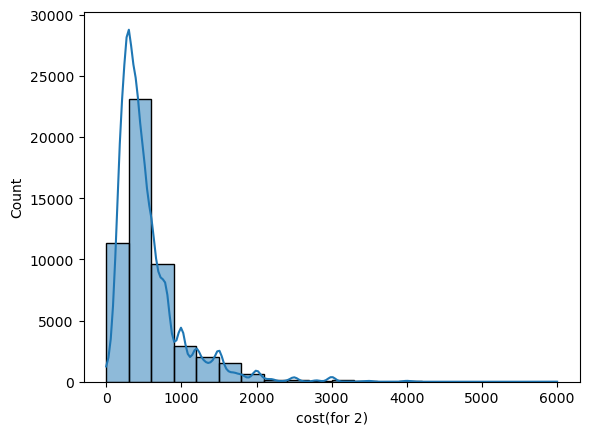

In [28]:
sns.histplot(data['cost(for 2)'], bins=20, kde=True)

<Axes: >

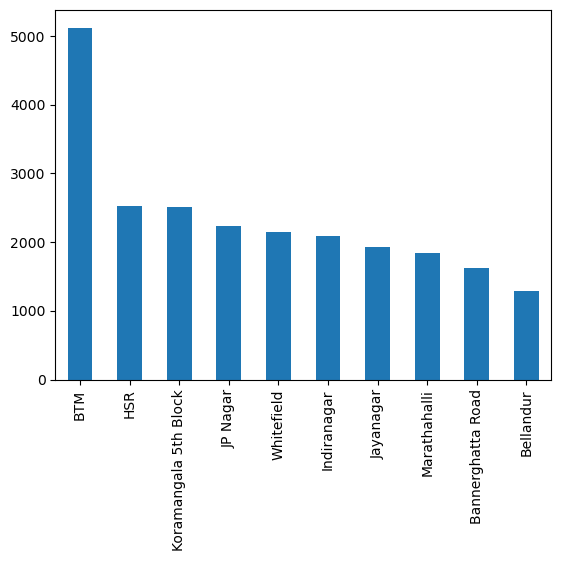

In [29]:
data['location'].value_counts().head(10).plot(kind='bar') #top 10

<Axes: xlabel='restaurant_type', ylabel='cost(for 2)'>

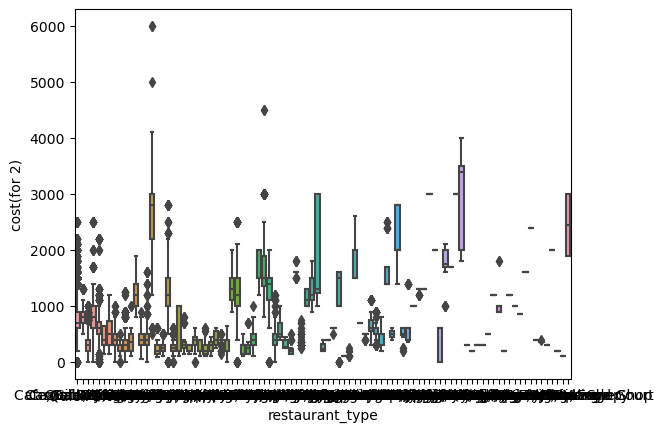

In [30]:
sns.boxplot(data=data, x='restaurant_type', y='cost(for 2)')

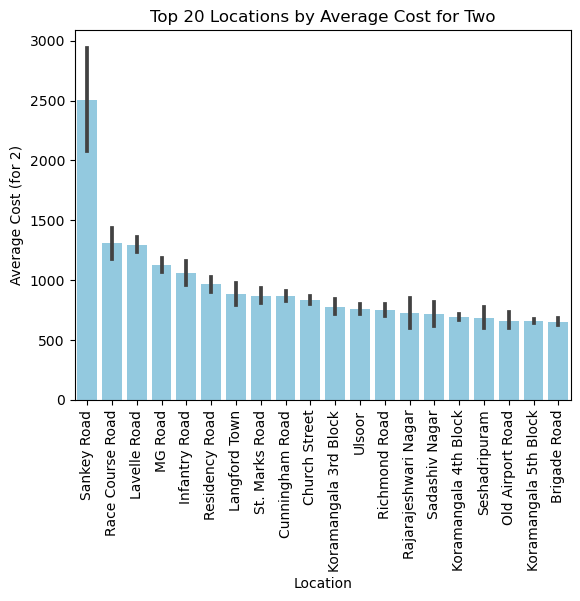

In [31]:
top_locations = data.groupby('location')['cost(for 2)'].mean().sort_values(ascending=False).head(20)
top_locations_data = data[data['location'].isin(top_locations.index)]
sns.barplot(data=top_locations_data, x='location', y='cost(for 2)', order=top_locations.index,color='skyblue')
plt.title("Top 20 Locations by Average Cost for Two")
plt.xlabel("Location")
plt.ylabel("Average Cost (for 2)")
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.show()

C:\Users\mukth\AppData\Local\Temp\ipykernel_12700\3499501668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


<Axes: >

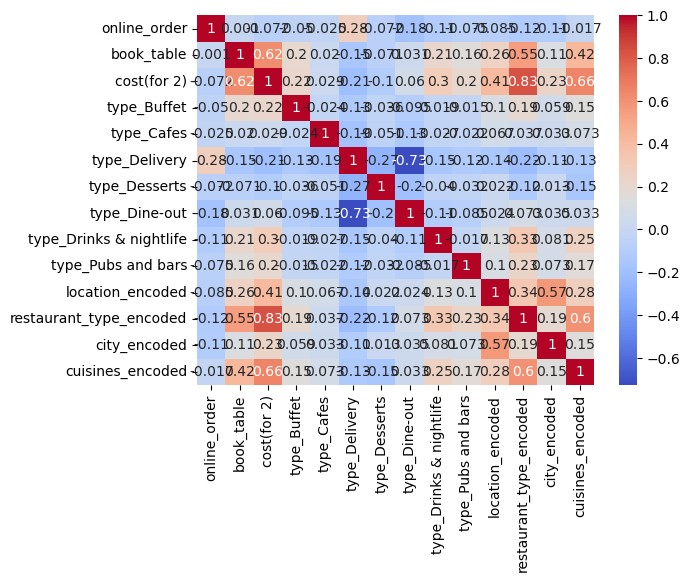

In [32]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

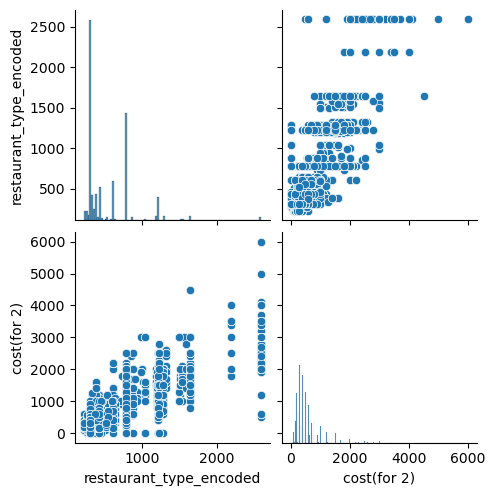

In [33]:
sns.pairplot(data, vars=['restaurant_type_encoded', 'cost(for 2)'])

<Axes: xlabel='cuisines'>

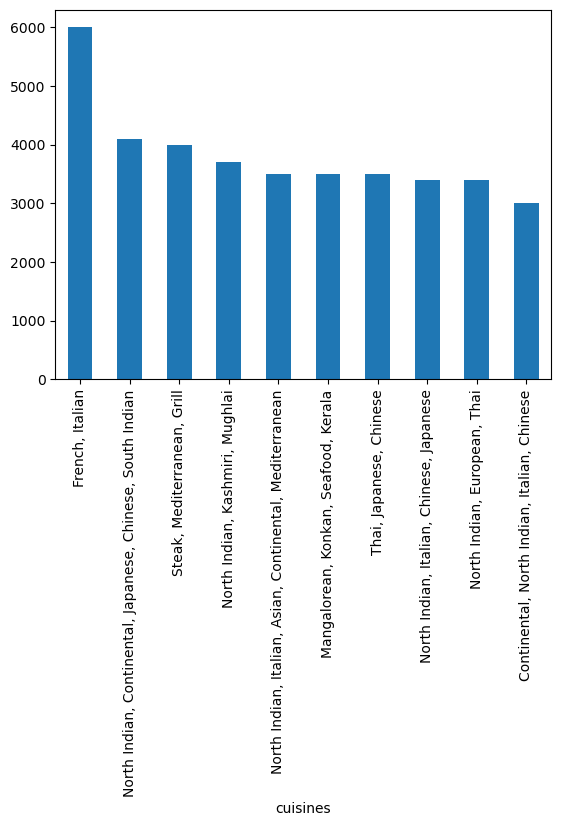

In [34]:
top_cuisines = data.groupby('cuisines')['cost(for 2)'].mean().sort_values(ascending=False).head(10)
top_cuisines.plot(kind='bar')

In [35]:
data.drop(columns=["location","city","cuisines","restaurant_type",],inplace=True)

In [36]:
x=data.drop(['cost(for 2)'],axis=1)
x

,online_order,book_table,type_Buffet,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,location_encoded,restaurant_type_encoded,city_encoded,cuisines_encoded
0,1,1,1,0,0,0,0,0,0,424.043533,786.119257,403.271656,548.103972
1,1,0,1,0,0,0,0,0,0,424.043533,786.119257,403.271656,582.308860
2,1,0,1,0,0,0,0,0,0,424.043533,788.001615,403.271656,585.433223
3,0,0,1,0,0,0,0,0,0,424.043533,317.025869,403.271656,398.111601
4,0,0,1,0,0,0,0,0,0,366.398170,786.119257,403.271656,524.681820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,0,0,0,0,0,0,0,0,1,594.683139,1228.011592,574.372488,893.120643
51713,0,0,0,0,0,0,0,0,1,594.683139,1228.011592,574.372488,1259.646286
51714,0,0,0,0,0,0,0,0,1,594.683139,1228.011592,574.372488,1259.646286
51715,0,1,0,0,0,0,0,0,1,509.280539,1228.011592,574.372488,1259.646286


In [37]:
y=data['cost(for 2)']
y

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: cost(for 2), Length: 51717, dtype: int32

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=362)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((41373, 13), (10344, 13), (41373,), (10344,))

In [40]:
from sklearn.tree import DecisionTreeRegressor, export_text
decision_tree = DecisionTreeRegressor(random_state=42,criterion='squared_error',splitter='best', max_depth=20)
decision_tree.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=20, random_state=42)

In [41]:
rules = export_text(decision_tree, feature_names=list(x.columns))
print("Decision Tree Rules:\n")
print(rules)

Decision Tree Rules:

|--- restaurant_type_encoded <= 689.26
|   |--- cuisines_encoded <= 548.20
|   |   |--- restaurant_type_encoded <= 363.31
|   |   |   |--- cuisines_encoded <= 370.04
|   |   |   |   |--- cuisines_encoded <= 280.08
|   |   |   |   |   |--- location_encoded <= 403.33
|   |   |   |   |   |   |--- city_encoded <= 467.70
|   |   |   |   |   |   |   |--- online_order <= 0.50
|   |   |   |   |   |   |   |   |--- city_encoded <= 424.45
|   |   |   |   |   |   |   |   |   |--- value: [225.00]
|   |   |   |   |   |   |   |   |--- city_encoded >  424.45
|   |   |   |   |   |   |   |   |   |--- type_Delivery <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- cuisines_encoded <= 257.88
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- cuisines_encoded >  257.88
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- type_Delivery >  0.50
|   |

In [42]:
ypred = decision_tree.predict(xtest)

In [43]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
print(f"\nModel RMSE: {rmse:.2f}")


Model RMSE: 115.38


In [44]:
decision_tree.score(xtest,ytest)

0.9313743523621392

In [45]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [46]:
import lime
import lime.lime_tabular

In [47]:
explainer = lime.lime_tabular.LimeTabularExplainer(xtrain.values, feature_names=xtrain.columns.values.tolist(),
                                                  class_names=['cost(for 2)'], verbose=True, mode='regression')

In [48]:
xtest.head()

,online_order,book_table,type_Buffet,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,location_encoded,restaurant_type_encoded,city_encoded,cuisines_encoded
26052,1,0,0,0,0,0,1,0,0,455.372663,317.025869,467.749930,551.667932
11743,1,0,0,0,1,0,0,0,0,1113.256196,317.025869,767.429045,573.415745
34392,0,0,0,0,0,0,1,0,0,432.896909,317.025869,516.109820,477.906239
36831,0,0,0,0,0,0,1,0,0,655.949470,612.335904,516.366064,552.434810
2481,0,1,1,0,0,0,0,0,0,475.223182,786.119257,445.623947,559.730960


In [49]:
ytest.head()

26052    500
11743    700
34392    300
36831    600
2481     700
Name: cost(for 2), dtype: int32

In [50]:
j = 1
exp = explainer.explain_instance(xtest.values[j], decision_tree.predict, num_features=13)

Intercept 518.4147400387938
Prediction_local [639.2021661]
Right: 700.0


C:\Users\mukth\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [51]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [52]:
import pickle as pkl

In [53]:
filename='zomato.sav'
pkl.dump(decision_tree,open(filename,'bw'))

In [54]:
loaded_model=pkl.load(open(filename,'br'))
loaded_model

DecisionTreeRegressor(max_depth=20, random_state=42)

In [55]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [56]:
import gradio as gd

In [57]:
print(data.columns)

Index(['online_order', 'book_table', 'cost(for 2)', 'type_Buffet',
       'type_Cafes', 'type_Delivery', 'type_Desserts', 'type_Dine-out',
       'type_Drinks & nightlife', 'type_Pubs and bars', 'location_encoded',
       'restaurant_type_encoded', 'city_encoded', 'cuisines_encoded'],
      dtype='object')


In [58]:
def predict_cost(online_order, book_table, selected_types, location, restaurant_type, city,cuisines):
    # Encode categorical variables (mapping based on target encoding or other transformations used during training)
    location_encoded = location_encoded_mapping.get(location)  # Replace with actual mapping or encoding for location
    cuisines_encoded = cuisines_encoded_mapping.get(cuisines)  # Replace with actual mapping or encoding for cuisines
    city_encoded = city_encoded_mapping.get(city)              # Replace with actual mapping or encoding for city
    restaurant_type_encoded = restaurant_type_encoded_mapping.get(restaurant_type)  # Replace with actual mapping or encoding for restaurant type
    
    # Encode binary variables
    online_order_encoded = 1 if online_order == 'Yes' else 0
    book_table_encoded = 1 if book_table == 'Yes' else 0
    type_list = ['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out', 'Drinks & nightlife', 'Pubs and bars']
    type_encoded = [1 if t in selected_types else 0 for t in type_list]
    # Combine features into a NumPy array, ensuring all are in the right format
    # Only the `type_encoded` is one-hot encoded, others are integer encoded
    x = np.array([
        online_order_encoded,
        book_table_encoded,
        *type_encoded,
        location_encoded,  # Integer encoded location
        restaurant_type_encoded,  
        city_encoded,      # Integer encoded city
        cuisines_encoded,
              # One-hot encoded type (as passed to the function)
    ])

    # Predict using the decision tree model
    prediction = loaded_model.predict(x.reshape(1, -1))

    return prediction[0]

In [65]:
location_encoded = location_encoded_mapping.get("Whitefield")
cuisines_encoded = cuisines_encoded_mapping.get("Finger Food")
city_encoded = city_encoded_mapping.get("Whitefield")            
restaurant_type_encoded = restaurant_type_encoded_mapping.get("Bar")

print(location_encoded)
print(cuisines_encoded)
print(city_encoded)
print(restaurant_type_encoded)

online_order_encoded = 0
book_table_encoded = 1
type_encoded = [0, 0, 0, 0, 0, 0, 1]
x = np.array([
        online_order_encoded,
        book_table_encoded,
        *type_encoded,
        location_encoded,  # Integer encoded location
        restaurant_type_encoded,  
        city_encoded,      # Integer encoded city
        cuisines_encoded,
              # One-hot encoded type (as passed to the function)
    ])

prediction = loaded_model.predict(x.reshape(1, -1))
print(prediction[0])

594.6831385097132
473.5202428601813
574.3724882622759
1228.0115923779908
1400.0


C:\Users\mukth\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [64]:
# Example call to the function with type encoded as [0,0,0,0,0,0,1]
predicted_cost = predict_cost(
    online_order="No", 
    book_table="No", 
    selected_types=["Pubs and bars"],
    location="Whitefield", 
    restaurant_type="Bar",
    city="Whitefield", 
    cuisines="Continental" 
    
    # One-hot encoded for 'type' (assumed to be in order)
)

print("Predicted Cost:", predicted_cost)


Predicted Cost: 1000.0


C:\Users\mukth\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [61]:
app = gd.Interface(fn=predict_cost,
                   inputs=[
                       gd.Dropdown(label='Select Location', choices=list(location_encoded_mapping.keys())),
                       gd.Dropdown(label='Select Cuisines', choices=list(cuisines_encoded_mapping.keys())),
                       gd.Dropdown(label='Select City', choices=list(city_encoded_mapping.keys())),
                       gd.Dropdown(label='Select Restaurant Type', choices=list(restaurant_type_encoded_mapping.keys())),
                       gd.Radio(label='Online Order', choices=['Yes', 'No']),
                       gd.Radio(label='Book Table', choices=['Yes', 'No']),
                       gd.Radio(label="Select Type", choices=[
                           'Buffet', 'Cafes', 'Delivery', 'Desserts', 
                           'Dine-out', 'Drinks & nightlife', 'Pubs and bars'
                       ])
                   ],
                   outputs=gd.Textbox(label="Predicted Cost"),
                   title='Restaurant Cost Prediction Model',
                   description='Enter restaurant details to predict the cost')

In [62]:
app.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\mukth\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\mukth\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [66]:
pip install fastapi uvicorn nest_asyncio pydantic


Note: you may need to restart the kernel to use updated packages.


In [69]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import numpy as np
import pickle

# Initialize FastAPI app
app = FastAPI()

# Load the trained model and encoding mappings
# Replace 'model.pkl' and mapping files with actual paths
filename='zomato.sav'
pkl.dump(decision_tree,open(filename,'bw'))
loaded_model=pkl.load(open(filename,'br'))
loaded_model
'''
with open("filename", "rb") as model_file:
    loaded_model = pickle.load(model_file)
'''

# Replace with your actual encoding mappings
"""
location_encoded_mapping = {"Location1": 1, "Location2": 2}
cuisines_encoded_mapping = {"Cuisine1": 1, "Cuisine2": 2}
city_encoded_mapping = {"City1": 1, "City2": 2}
restaurant_type_encoded_mapping = {"Type1": 1, "Type2": 2}
"""

location_encoded_mapping = map_fearure_to_encoded_values(unique_locations_list,unique_location_encoded_list)
city_encoded_mapping = map_fearure_to_encoded_values(unique_cities_list,unique_city_encoded_list)
cuisines_encoded_mapping = map_fearure_to_encoded_values(unique_cuisines_list,unique_cuisines_encoded_list)
restaurant_type_encoded_mapping = map_fearure_to_encoded_values(unique_restaurant_type_list,unique_restaurant_type_encoded_list)

# Request model
class PredictionRequest(BaseModel):
    online_order: str  # "Yes" or "No"
    book_table: str  # "Yes" or "No"
    selected_types: List[str]  # List of selected types
    location: str  # Location name
    restaurant_type: str  # Restaurant type
    city: str  # City name
    cuisines: str  # Cuisine name

# Prediction endpoint
@app.post("/predict")
def predict_cost_endpoint(request: PredictionRequest):
    # Encode categorical variables
    location_encoded = location_encoded_mapping.get(request.location, 0)
    cuisines_encoded = cuisines_encoded_mapping.get(request.cuisines, 0)
    city_encoded = city_encoded_mapping.get(request.city, 0)
    restaurant_type_encoded = restaurant_type_encoded_mapping.get(request.restaurant_type, 0)

    # Encode binary variables
    online_order_encoded = 1 if request.online_order == "Yes" else 0
    book_table_encoded = 1 if request.book_table == "Yes" else 0

    # One-hot encode `selected_types`
    type_list = ['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out', 'Drinks & nightlife', 'Pubs and bars']
    type_encoded = [1 if t in request.selected_types else 0 for t in type_list]

    # Combine features into a NumPy array
    x = np.array([
        online_order_encoded,
        book_table_encoded,
        *type_encoded,
        location_encoded,
        restaurant_type_encoded,
        city_encoded,
        cuisines_encoded,
    ])

    # Make prediction
    prediction = loaded_model.predict(x.reshape(1, -1))
    return {"predicted_cost": prediction[0]}



In [ ]:
import nest_asyncio
import uvicorn
from uvicorn import Config, Server


# Patch the event loop for Jupyter
nest_asyncio.apply()

# Start the server
config = Config(app=app, host="127.0.0.1", port=8000, log_level="info")
server = Server(config)
server.run()

INFO:     Started server process [12700]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:62903 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:62903 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:63367 - "POST /predict HTTP/1.1" 422 Unprocessable Entity
INFO:     127.0.0.1:63373 - "POST /predict HTTP/1.1" 422 Unprocessable Entity
INFO:     127.0.0.1:63394 - "POST /predict HTTP/1.1" 422 Unprocessable Entity
INFO:     127.0.0.1:63400 - "POST /predict HTTP/1.1" 200 OK


C:\Users\mukth\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


INFO:     127.0.0.1:63435 - "POST /predict HTTP/1.1" 200 OK


C:\Users\mukth\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
